Подключили датафрейм и выгрузили данные

In [4]:
import pandas as pd
from sklearn import set_config
set_config(transform_output="pandas")
random_state = 42
df = pd.read_csv("data/diabetes.csv")
print(df.columns)
df

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

## Бизнес-цели
1. Предсказание риска развития диабета. Будем классифицировать пациентов на основе медданных для того, чтобы определить у кого есть риск развития диабета(будем использовать целевой признак "Outcome"). Актуальность для раннего выявления диабета.
2. Анализ ключевых факторов, влияющих на диабет. Предсказание вероятности развития диабета на основе медданных. Актуальность для планирвоания лечения.
## Определение достижимого уровня качества модели для первой задачи
Разделение данных на обучающую и тестовые выборки 80/20 для задачи классификации

In [5]:
from typing import Tuple
import pandas as pd
from pandas import DataFrame
from sklearn.model_selection import train_test_split

random_state = 42

def split_stratified_into_train_val_test(
    df_input,
    stratify_colname="y",
    frac_train=0.6,
    frac_val=0.15,
    frac_test=0.25,
    random_state=None,
) -> Tuple[DataFrame, DataFrame, DataFrame, DataFrame, DataFrame, DataFrame]:
   
    if frac_train + frac_val + frac_test != 1.0:
        raise ValueError(
            "fractions %f, %f, %f do not add up to 1.0"
            % (frac_train, frac_val, frac_test)
        )
    if stratify_colname not in df_input.columns:
        raise ValueError("%s is not a column in the dataframe" % (stratify_colname))
    X = df_input
    y = df_input[
        [stratify_colname]
    ]
    df_train, df_temp, y_train, y_temp = train_test_split(
        X, y, stratify=y, test_size=(1.0 - frac_train), random_state=random_state
    )
    if frac_val <= 0:
        assert len(df_input) == len(df_train) + len(df_temp)
        return df_train, pd.DataFrame(), df_temp, y_train, pd.DataFrame(), y_temp
    relative_frac_test = frac_test / (frac_val + frac_test)
    df_val, df_test, y_val, y_test = train_test_split(
        df_temp,
        y_temp,
        stratify=y_temp,
        test_size=relative_frac_test,
        random_state=random_state,
    )
    assert len(df_input) == len(df_train) + len(df_val) + len(df_test)
    return df_train, df_val, df_test, y_train, y_val, y_test

X_train, X_val, X_test, y_train, y_val, y_test = split_stratified_into_train_val_test(
    df, stratify_colname="Outcome", frac_train=0.80, frac_val=0, frac_test=0.20, random_state=random_state
)

display("X_train", X_train)
display("y_train", y_train)

display("X_test", X_test)
display("y_test", y_test)

'X_train'

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
353            1       90             62             12       43  27.2   
711            5      126             78             27       22  29.6   
373            2      105             58             40       94  34.9   
46             1      146             56              0        0  29.7   
682            0       95             64             39      105  44.6   
..           ...      ...            ...            ...      ...   ...   
451            2      134             70              0        0  28.9   
113            4       76             62              0        0  34.0   
556            1       97             70             40        0  38.1   
667           10      111             70             27        0  27.5   
107            4      144             58             28      140  29.5   

     DiabetesPedigreeFunction  Age  Outcome  
353                     0.580   24        0  
711                     0.439   40        0  
373                     0.225   25        0  
46                      0.564   29        0  
682                     0.366   22        0  
..                        ...  ...      ...  
451                     0.542   23        1  
113                     0.391   25        0  
556                     0.218   30        0  
667                     0.141   40        1  
107                     0.287   37        0  

[614 rows x 9 columns]

'y_train'

Outcome
353        0
711        0
373        0
46         0
682        0
..       ...
451        1
113        0
556        0
667        1
107        0

[614 rows x 1 columns]

'X_test'

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
44             7      159             64              0        0  27.4   
672           10       68            106             23       49  35.5   
700            2      122             76             27      200  35.9   
630            7      114             64              0        0  27.4   
81             2       74              0              0        0   0.0   
..           ...      ...            ...            ...      ...   ...   
32             3       88             58             11       54  24.8   
637            2       94             76             18       66  31.6   
593            2       82             52             22      115  28.5   
425            4      184             78             39      277  37.0   
273            1       71             78             50       45  33.2   

     DiabetesPedigreeFunction  Age  Outcome  
44                      0.294   40        0  
672                     0.285   47        0  
700                     0.483   26        0  
630                     0.732   34        1  
81                      0.102   22        0  
..                        ...  ...      ...  
32                      0.267   22        0  
637                     0.649   23        0  
593                     1.699   25        0  
425                     0.264   31        1  
273                     0.422   21        0  

[154 rows x 9 columns]

'y_test'

Outcome
44         0
672        0
700        0
630        1
81         0
..       ...
32         0
637        0
593        0
425        1
273        0

[154 rows x 1 columns]

## Формирование конвейера для классификации данных
preprocessing_num -- конвейер для обработки числовых данных: заполнение пропущенных значений и стандартизация

preprocessing_cat -- конвейер для обработки категориальных данных: заполнение пропущенных данных и унитарное кодирование

features_preprocessing -- трансформер для предобработки признаков

features_engineering -- трансформер для конструирования признаков

drop_columns -- трансформер для удаления колонок

features_postprocessing -- трансформер для унитарного кодирования новых признаков

pipeline_end -- основной конвейер предобработки данных и конструирования признаков

Конвейер выполняется последовательно.

Трансформер выполняет параллельно для указанного набора колонок.

In [8]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Построение конвейеров предобработки
class DiabetesFeatures(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        # Добавим признак отношения индекса массы тела и возраста.
        X = X.copy()
        X["Glucose_Insulin"] = X["Glucose"] / X["Insulin"]
        return X

    def get_feature_names_out(self, features_in):
        new_features = ["Glucose_Insulin"]
        return np.append(features_in, new_features, axis=0)

# Обработка числовых данных. Числовой конвейр: заполнение пропущенных значений медианой и стандартизация
preprocessing_num_class = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessing_cat_class = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first'))
])

columns_to_drop = []
numeric_columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin",
                   "BMI", "DiabetesPedigreeFunction", "Age"]
cat_columns = ["Outcome"]

features_preprocessing = ColumnTransformer(
    verbose_feature_names_out=False,
    transformers=[
        ("preprocessing_num", preprocessing_num_class, numeric_columns),
        ("preprocessing_cat", preprocessing_cat_class, cat_columns),
    ],
    remainder="passthrough"
)

drop_columns = ColumnTransformer(
    verbose_feature_names_out=False,
    transformers=[
        ("drop_columns", "drop", columns_to_drop),
    ],
    remainder="passthrough",
)

features_postprocessing = ColumnTransformer(
    verbose_feature_names_out=False,
    transformers=[
        ('preprocessing_cat', preprocessing_cat_class, ["Outcome"]),
    ],
    remainder="passthrough",
)

pipeline_end = Pipeline(
    [
        ("features_preprocessing", features_preprocessing),
        ("custom_features", DiabetesFeatures()),
        ("drop_columns", drop_columns),
    ]
)

Работа конвейера:

In [9]:
preprocessing_result = pipeline_end.fit_transform(X_train)
preprocessed_df = pd.DataFrame(
    preprocessing_result,
    columns=pipeline_end.get_feature_names_out(),
)
preprocessed_df

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
353    -0.851355 -0.980131      -0.404784      -0.553973 -0.331319 -0.607678   
711     0.356576  0.161444       0.465368       0.392787 -0.526398 -0.302139   
373    -0.549372 -0.504474      -0.622322       1.213312  0.142444  0.372594   
46     -0.851355  0.795653      -0.731091      -1.311380 -0.730766 -0.289408   
682    -1.153338 -0.821579      -0.296015       1.150195  0.244628  1.607482   
..           ...       ...            ...            ...       ...       ...   
451    -0.549372  0.415128       0.030292      -1.311380 -0.730766 -0.391255   
113     0.054593 -1.424076      -0.404784      -1.311380 -0.730766  0.258017   
556    -0.851355 -0.758158       0.030292       1.213312 -0.730766  0.779980   
667     1.866489 -0.314212       0.030292       0.392787 -0.730766 -0.569486   
107     0.054593  0.732232      -0.622322       0.455904  0.569759 -0.314870   

     DiabetesPedigreeFunction       Age  Outcome_1  Glucose_Insulin  
353                  0.310794 -0.792169        0.0         2.958266  
711                 -0.116439  0.561034        0.0        -0.306696  
373                 -0.764862 -0.707594        0.0        -3.541575  
46                   0.262314 -0.369293        0.0        -1.088792  
682                 -0.337630 -0.961320        0.0        -3.358486  
..                        ...       ...        ...              ...  
451                  0.195653 -0.876744        1.0        -0.568071  
113                 -0.261879 -0.707594        0.0         1.948744  
556                 -0.786072 -0.284718        0.0         1.037483  
667                 -1.019383  0.561034        1.0         0.429976  
107                 -0.577001  0.307308        0.0         1.285160  

[614 rows x 10 columns]

## Формирование набора моделей для классификации
logistic -- логистическая регрессия

ridge -- гребневая регрессия

decision_tree -- дерево решений

knn -- k-ближайших соседей

naive_bayes -- наивный Байесовский классификатор

gradient_boosting -- метод градиентного бустинга (набор деревьев решений)

random_forest -- метод случайного леса (набор деревьев решений)

mlp -- многослойный персептрон (нейронная сеть)

In [10]:
from sklearn import ensemble, linear_model, naive_bayes, neighbors, neural_network, tree

random_state = 42

class_models = {
    "logistic": {"model": linear_model.LogisticRegression(random_state=random_state)},
    "ridge": {"model": linear_model.LogisticRegression(penalty="l2", class_weight="balanced", random_state=random_state)},
    "decision_tree": {
        "model": tree.DecisionTreeClassifier(max_depth=7, random_state=random_state)
    },
    "knn": {"model": neighbors.KNeighborsClassifier(n_neighbors=7)},
    "naive_bayes": {"model": naive_bayes.GaussianNB()},
    "gradient_boosting": {
        "model": ensemble.GradientBoostingClassifier(n_estimators=210, random_state=random_state)
    },
    "random_forest": {
        "model": ensemble.RandomForestClassifier(
            max_depth=11, class_weight="balanced", random_state=random_state
        )
    },
    "mlp": {
        "model": neural_network.MLPClassifier(
            hidden_layer_sizes=(7,),
            max_iter=500,
            early_stopping=True,
            random_state=random_state,
        )
    },
}

Обучение моделей на обучающем наборе данных и оценка на тестовом

In [11]:
import numpy as np
from sklearn import metrics

for model_name in class_models.keys():
    print(f"Model: {model_name}")
    model = class_models[model_name]["model"]

    model_pipeline = Pipeline([("pipeline", pipeline_end), ("model", model)])
    model_pipeline = model_pipeline.fit(X_train, y_train.values.ravel())

    y_train_predict = model_pipeline.predict(X_train)
    y_test_probs = model_pipeline.predict_proba(X_test)[:, 1]
    y_test_predict = np.where(y_test_probs > 0.5, 1, 0)

    class_models[model_name]["pipeline"] = model_pipeline
    class_models[model_name]["probs"] = y_test_probs
    class_models[model_name]["preds"] = y_test_predict

    class_models[model_name]["Precision_train"] = metrics.precision_score(
        y_train, y_train_predict
    )
    class_models[model_name]["Precision_test"] = metrics.precision_score(
        y_test, y_test_predict
    )
    class_models[model_name]["Recall_train"] = metrics.recall_score(
        y_train, y_train_predict
    )
    class_models[model_name]["Recall_test"] = metrics.recall_score(
        y_test, y_test_predict
    )
    class_models[model_name]["Accuracy_train"] = metrics.accuracy_score(
        y_train, y_train_predict
    )
    class_models[model_name]["Accuracy_test"] = metrics.accuracy_score(
        y_test, y_test_predict
    )
    class_models[model_name]["ROC_AUC_test"] = metrics.roc_auc_score(
        y_test, y_test_probs
    )
    class_models[model_name]["F1_train"] = metrics.f1_score(y_train, y_train_predict)
    class_models[model_name]["F1_test"] = metrics.f1_score(y_test, y_test_predict)
    class_models[model_name]["MCC_test"] = metrics.matthews_corrcoef(
        y_test, y_test_predict
    )
    class_models[model_name]["Cohen_kappa_test"] = metrics.cohen_kappa_score(
        y_test, y_test_predict
    )
    class_models[model_name]["Confusion_matrix"] = metrics.confusion_matrix(
        y_test, y_test_predict
    )

Model: logistic
Model: ridge
Model: decision_tree
Model: knn
Model: naive_bayes
Model: gradient_boosting
Model: random_forest
Model: mlp


Сводная таблица оценок качества для использованных моделей классификации

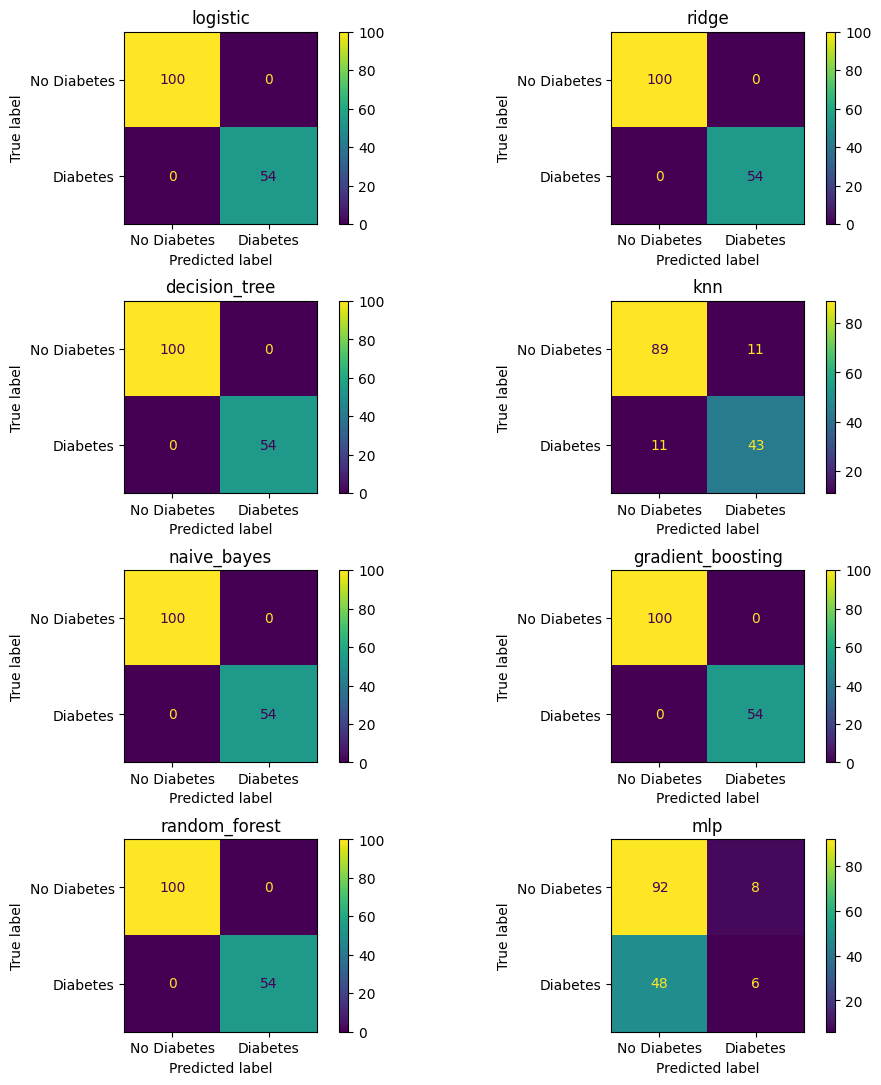

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

n_rows = int(len(class_models) / 2)
n_cols = 2

fig, ax = plt.subplots(n_rows, n_cols, figsize=(12, 10), sharex=False, sharey=False)

for index, key in enumerate(class_models.keys()):
    c_matrix = class_models[key]["Confusion_matrix"]
    disp = ConfusionMatrixDisplay(
        confusion_matrix=c_matrix, display_labels=["No Diabetes", "Diabetes"]
    ).plot(ax=ax.flat[index])
    disp.ax_.set_title(key)

plt.subplots_adjust(top=1, bottom=0, hspace=0.4, wspace=0.1)
plt.show()

Значение 100 - это количество вернных диагнозов (True Positives), там модель верно определила людей у которых нет диабета "No Diabetes".

Значение 54 у некоторых моделей - это количество неверных диагнозов (False Negatives), там модель неверно определила людей с диабетом, те, у кого нет диабета "No Diabetes" были отнесены к классу "Diabetes".

Исходя из истинных и ложных значений (True Positives и False Negatives), можно сделать вывод, что модель имеет высокую точность при предсказании людей без диабета "No Diabetes". Уровень ложных результатов в некотоорых моделях со значением 54 говорит о том, что есть такие данные, которые модель пропускает.

Точность, полнота, верность (аккуратность), F-мера

In [14]:
class_metrics = pd.DataFrame.from_dict(class_models, "index")[
    [
        "Precision_train",
        "Precision_test",
        "Recall_train",
        "Recall_test",
        "Accuracy_train",
        "Accuracy_test",
        "F1_train",
        "F1_test",
    ]
]
class_metrics.sort_values(
    by="Accuracy_test", ascending=False
).style.background_gradient(
    cmap="plasma",
    low=0.3,
    high=1,
    subset=["Accuracy_train", "Accuracy_test", "F1_train", "F1_test"],
).background_gradient(
    cmap="viridis",
    low=1,
    high=0.3,
    subset=[
        "Precision_train",
        "Precision_test",
        "Recall_train",
        "Recall_test",
    ],
)

Почти все модели в данной выборке, а именно логистическая регрессия, ридж-регрессия, дерево решений, наивный байесовский классификатор, случайный лес, градиентный бустинг, KNN демонстрируют неплохие значения по всем метрикам на обучающих и тестовых наборах данных. Модель MLP не так эффективна по сравнению с другими, но в некоторых метриках показывает неплохие результаты.

In [15]:
class_metrics = pd.DataFrame.from_dict(class_models, "index")[
    [
        "Accuracy_test",
        "F1_test",
        "ROC_AUC_test",
        "Cohen_kappa_test",
        "MCC_test",
    ]
]
class_metrics.sort_values(by="ROC_AUC_test", ascending=False).style.background_gradient(
    cmap="plasma",
    low=0.3,
    high=1,
    subset=[
        "ROC_AUC_test",
        "MCC_test",
        "Cohen_kappa_test",
    ],
).background_gradient(
    cmap="viridis",
    low=1,
    high=0.3,
    subset=[
        "Accuracy_test",
        "F1_test",
    ],
)

Такой же вывод можно сделать и для следующих метрик: Accuracy, F1, ROC AUC, Cohen's Kappa и MCC. Все модели, кроме KNN и MLP, указывают на хорошо-развитую способность к выделению классов

In [16]:
best_model = str(class_metrics.sort_values(by="MCC_test", ascending=False).iloc[0].name)

display(best_model)

'logistic'

Вывод данных с ошибкой предсказания для оценки

In [17]:
preprocessing_result = pipeline_end.transform(X_test)
preprocessed_df = pd.DataFrame(
    preprocessing_result,
    columns=pipeline_end.get_feature_names_out(),
)

y_pred = class_models[best_model]["preds"]

error_index = y_test[y_test["Outcome"] != y_pred].index.tolist()
display(f"Error items count: {len(error_index)}")

error_predicted = pd.Series(y_pred, index=y_test.index).loc[error_index]
error_df = X_test.loc[error_index].copy()
error_df.insert(loc=1, column="Predicted", value=error_predicted)
error_df.sort_index()

'Error items count: 0'

Empty DataFrame
Columns: [Pregnancies, Predicted, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []

Пример использования обученной модели (конвейера) для предсказания

In [22]:
model = class_models[best_model]["pipeline"]

example_id = 190
test = pd.DataFrame(X_test.loc[example_id, :]).T
test_preprocessed = pd.DataFrame(preprocessed_df.loc[example_id, :]).T
display(test)
display(test_preprocessed)
result_proba = model.predict_proba(test)[0]
result = model.predict(test)[0]
real = int(y_test.loc[example_id].values[0])
display(f"predicted: {result} (proba: {result_proba})")
display(f"real: {real}")

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
190          3.0    111.0           62.0            0.0      0.0  22.6   

     DiabetesPedigreeFunction   Age  Outcome  
190                     0.142  21.0      0.0

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
190     -0.24739 -0.314212      -0.404784       -1.31138 -0.730766 -1.193296   

     DiabetesPedigreeFunction       Age  Outcome_1  Glucose_Insulin  
190                 -1.016353 -1.045895        0.0         0.429976

'predicted: 0 (proba: [0.99177252 0.00822748])'

'real: 0'

Подбор гиперпараметров методом поиска по сетке

In [25]:
from sklearn.model_selection import GridSearchCV

optimized_model_type = "random_forest"

random_forest_model = class_models[optimized_model_type]["pipeline"]

param_grid = {
    "model__n_estimators": [10, 50, 100],
    "model__max_features": ["sqrt", "log2"],
    "model__max_depth": [5, 7, 10],
    "model__criterion": ["gini", "entropy"],
}

gs_optomizer = GridSearchCV(
    estimator=random_forest_model, param_grid=param_grid, n_jobs=-1
)
gs_optomizer.fit(X_train, y_train.values.ravel())
gs_optomizer.best_params_

c:\Users\tabee\AIM_PIbd-31_Tabeev_A.P\.venv\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


{'model__criterion': 'gini',
 'model__max_depth': 5,
 'model__max_features': 'sqrt',
 'model__n_estimators': 10}

Обучение модели с новыми гиперпараметрами

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn import metrics
import pandas as pd

numeric_features = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()

random_state = 42
# Определение трансформера
pipeline_end = ColumnTransformer([
    ('numeric', StandardScaler(), numeric_features),
])

optimized_model = RandomForestClassifier(
    random_state=random_state,
    criterion="gini",
    max_depth=5,
    max_features="sqrt",
    n_estimators=50,
)

result = {}

# Обучение модели
result["pipeline"] = Pipeline([
    ("pipeline", pipeline_end),
    ("model", optimized_model)
]).fit(X_train, y_train.values.ravel())

# Прогнозирование и расчет метрик
result["train_preds"] = result["pipeline"].predict(X_train)
result["probs"] = result["pipeline"].predict_proba(X_test)[:, 1]
result["preds"] = np.where(result["probs"] > 0.5, 1, 0)

# Метрики для оценки модели
result["Precision_train"] = metrics.precision_score(y_train, result["train_preds"])
result["Precision_test"] = metrics.precision_score(y_test, result["preds"])
result["Recall_train"] = metrics.recall_score(y_train, result["train_preds"])
result["Recall_test"] = metrics.recall_score(y_test, result["preds"])
result["Accuracy_train"] = metrics.accuracy_score(y_train, result["train_preds"])
result["Accuracy_test"] = metrics.accuracy_score(y_test, result["preds"])
result["ROC_AUC_test"] = metrics.roc_auc_score(y_test, result["probs"])
result["F1_train"] = metrics.f1_score(y_train, result["train_preds"])
result["F1_test"] = metrics.f1_score(y_test, result["preds"])
result["MCC_test"] = metrics.matthews_corrcoef(y_test, result["preds"])
result["Cohen_kappa_test"] = metrics.cohen_kappa_score(y_test, result["preds"])
result["Confusion_matrix"] = metrics.confusion_matrix(y_test, result["preds"])

Формирование данных для оценки старой и новой версии модели

In [27]:
optimized_metrics = pd.DataFrame(columns=list(result.keys()))
optimized_metrics.loc[len(optimized_metrics)] = pd.Series(
    data=class_models[optimized_model_type]
)
optimized_metrics.loc[len(optimized_metrics)] = pd.Series(
    data=result
)
optimized_metrics.insert(loc=0, column="Name", value=["Old", "New"])
optimized_metrics = optimized_metrics.set_index("Name")

Оценка параметров старой и новой модели

In [28]:
optimized_metrics[
    [
        "Precision_train",
        "Precision_test",
        "Recall_train",
        "Recall_test",
        "Accuracy_train",
        "Accuracy_test",
        "F1_train",
        "F1_test",
    ]
].style.background_gradient(
    cmap="plasma",
    low=0.3,
    high=1,
    subset=["Accuracy_train", "Accuracy_test", "F1_train", "F1_test"],
).background_gradient(
    cmap="viridis",
    low=1,
    high=0.3,
    subset=[
        "Precision_train",
        "Precision_test",
        "Recall_train",
        "Recall_test",
    ],
)

In [29]:
optimized_metrics[
    [
        "Accuracy_test",
        "F1_test",
        "ROC_AUC_test",
        "Cohen_kappa_test",
        "MCC_test",
    ]
].style.background_gradient(
    cmap="plasma",
    low=0.3,
    high=1,
    subset=[
        "ROC_AUC_test",
        "MCC_test",
        "Cohen_kappa_test",
    ],
).background_gradient(
    cmap="viridis",
    low=1,
    high=0.3,
    subset=[
        "Accuracy_test",
        "F1_test",
    ],
)

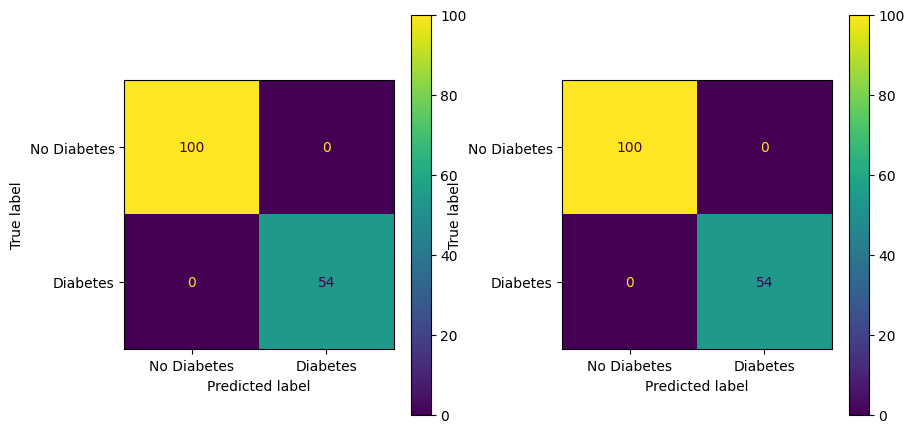

In [30]:
_, ax = plt.subplots(1, 2, figsize=(10, 4), sharex=False, sharey=False
)

for index in range(0, len(optimized_metrics)):
    c_matrix = optimized_metrics.iloc[index]["Confusion_matrix"]
    disp = ConfusionMatrixDisplay(
        confusion_matrix=c_matrix, display_labels=["No Diabetes", "Diabetes"]
    ).plot(ax=ax.flat[index])

plt.subplots_adjust(top=1, bottom=0, hspace=0.4, wspace=0.3)
plt.show()

Значение 100 означает количество верно классифицированных объектов, которые относятся к классу "No Diabetes". Можно сделать вывод, что модель отлично идентифицирует объекты этого класса.

Значения 0 означают количество верно классифицированных объектов, которые относятся к классу "Diabetes". Можно сделать вывод, что это не высокая точность модели в определении объектов данного класса

## Определение достижимого уровня качества модели для второй задачи (задача регрессии)

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import set_config

random_state = 42
set_config(transform_output="pandas")

df = pd.read_csv("data/diabetes.csv")

df = df.drop(columns=["Outcome"])

df = df.sample(n=700, random_state=random_state).reset_index(drop=True)

print(df.shape)  
display(df)

(700, 8)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6       98             58             33      190  34.0   
1              2      112             75             32        0  35.7   
2              2      108             64              0        0  30.8   
3              8      107             80              0        0  24.6   
4              7      136             90              0        0  29.9   
..           ...      ...            ...            ...      ...   ...   
695            2      105             80             45      191  33.7   
696            1      126             56             29      152  28.7   
697            2       95             54             14       88  26.1   
698            3      100             68             23       81  31.6   
699            1       85             66             29        0  26.6   

     DiabetesPedigreeFunction  Age  
0                       0.430   43  
1                       0.148   21  
2                       0.158   21  
3                       0.856   34  
4                       0.210   50  
..                        ...  ...  
695                     0.711   29  
696                     0.801   21  
697                     0.748   22  
698                     0.949   28  
699                     0.351   31  

[700 rows x 8 columns]

In [32]:
import pandas as pd

df = pd.read_csv("data/diabetes.csv")

required_columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]
missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    raise ValueError(f"Отсутствуют столбцы: {missing_columns}")

df["diabetes_risk_index"] = (
    df["Glucose"] * 0.3  
    + df["BMI"] * 0.3  
    + df["Age"] * 0.2  
    + df["BloodPressure"] * 0.1  
    + df["Insulin"] * 0.1  
)

print(df[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "diabetes_risk_index"]].head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  diabetes_risk_index  
0                     0.627   50                71.68  
1                     0.351   31                46.28  
2                     0.672   32                74.69  
3                     0.167   21                55.33  
4                     2.288   33                81.43  


Разделение набора данных на обучающую и тестовые выборки (80/20) для задачи регрессии

In [33]:
from typing import Tuple
import pandas as pd
from pandas import DataFrame
from sklearn.model_selection import train_test_split

def split_into_train_test(
    df_input: DataFrame,
    target_colname: str = "diabetes_risk_index",
    frac_train: float = 0.8,
    random_state: int = None,
) -> Tuple[DataFrame, DataFrame, DataFrame, DataFrame]:
    if not (0 < frac_train < 1):
        raise ValueError("Fraction must be between 0 and 1.")
    
    if target_colname not in df_input.columns:
        raise ValueError(f"{target_colname} is not a column in the DataFrame.")
    
    X = df_input.drop(columns=[target_colname])
    y = df_input[[target_colname]]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=(1.0 - frac_train),
        random_state=random_state
    )
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_into_train_test(
    df, 
    target_colname="diabetes_risk_index", 
    frac_train=0.8, 
    random_state=42
)

display("X_train", X_train.head())
display("y_train", y_train.head())

display("X_test", X_test.head())
display("y_test", y_test.head())

'X_train'

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
60             2       84              0              0        0   0.0   
618            9      112             82             24        0  28.2   
346            1      139             46             19       83  28.7   
294            0      161             50              0        0  21.9   
231            6      134             80             37      370  46.2   

     DiabetesPedigreeFunction  Age  Outcome  
60                      0.304   21        0  
618                     1.282   50        1  
346                     0.654   22        0  
294                     0.254   65        0  
231                     0.238   46        1

'y_train'

diabetes_risk_index
60                 29.40
618                60.26
346                67.61
294                72.87
231               108.26

'X_test'

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
668            6       98             58             33      190  34.0   
324            2      112             75             32        0  35.7   
624            2      108             64              0        0  30.8   
690            8      107             80              0        0  24.6   
473            7      136             90              0        0  29.9   

     DiabetesPedigreeFunction  Age  Outcome  
668                     0.430   43        0  
324                     0.148   21        0  
624                     0.158   21        0  
690                     0.856   34        0  
473                     0.210   50        0

'y_test'

diabetes_risk_index
668                73.00
324                56.01
624                52.24
690                54.28
473                68.77

Определение перечня алгоритмов решения задачи аппроксимации (регрессии)

In [34]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn import linear_model, tree, neighbors, ensemble, neural_network

random_state = 42

models = {
    # Линейная регрессия
    "linear": {
        "model": linear_model.LinearRegression(n_jobs=-1)
    },
    # Полиномиальная регрессия степени 2
    "linear_poly": {
        "model": make_pipeline(
            PolynomialFeatures(degree=2),
            StandardScaler(),
            linear_model.LinearRegression(fit_intercept=False, n_jobs=-1),
        )
    },
    # Полиномиальная регрессия с взаимодействиями
    "linear_interact": {
        "model": make_pipeline(
            PolynomialFeatures(interaction_only=True),
            StandardScaler(),
            linear_model.LinearRegression(fit_intercept=False, n_jobs=-1),
        )
    },
    # Ridge-регрессия
    "ridge": {
        "model": make_pipeline(
            StandardScaler(),
            linear_model.RidgeCV()
        )
    },
    # Регрессия на основе дерева решений
    "decision_tree": {
        "model": tree.DecisionTreeRegressor(max_depth=7, random_state=random_state)
    },
    # Метод ближайших соседей (kNN)
    "knn": {
        "model": make_pipeline(
            StandardScaler(),
            neighbors.KNeighborsRegressor(n_neighbors=7, n_jobs=-1)
        )
    },
    # Случайный лес (Random Forest)
    "random_forest": {
        "model": ensemble.RandomForestRegressor(
            max_depth=7, random_state=random_state, n_jobs=-1
        )
    },
    # Нейронная сеть (MLPRegressor)
    "mlp": {
        "model": make_pipeline(
            StandardScaler(),
            neural_network.MLPRegressor(
                activation="tanh",
                hidden_layer_sizes=(3,),
                max_iter=500,
                early_stopping=True,
                random_state=random_state,
            )
        )
    },
}

Обучение и оценка моделей с помощью различных алгоритмов

In [35]:
import math
from pandas import DataFrame
from sklearn import metrics

for model_name in models.keys():
    print(f"Model: {model_name}")

    fitted_model = models[model_name]["model"].fit(
        X_train.values, y_train.values.ravel()
    )
    y_train_pred = fitted_model.predict(X_train.values)
    y_test_pred = fitted_model.predict(X_test.values)
    models[model_name]["fitted"] = fitted_model
    models[model_name]["train_preds"] = y_train_pred
    models[model_name]["preds"] = y_test_pred
    models[model_name]["RMSE_train"] = math.sqrt(
        metrics.mean_squared_error(y_train, y_train_pred)
    )
    models[model_name]["RMSE_test"] = math.sqrt(
        metrics.mean_squared_error(y_test, y_test_pred)
    )
    models[model_name]["RMAE_test"] = math.sqrt(
        metrics.mean_absolute_error(y_test, y_test_pred)
    )
    models[model_name]["R2_test"] = metrics.r2_score(y_test, y_test_pred)

Model: linear
Model: linear_poly
Model: linear_interact
Model: ridge
Model: decision_tree
Model: knn
Model: random_forest
Model: mlp


c:\Users\tabee\AIM_PIbd-31_Tabeev_A.P\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Вывод результатов оценки

In [36]:
reg_metrics = pd.DataFrame.from_dict(models, "index")[
    ["RMSE_train", "RMSE_test", "RMAE_test", "R2_test"]
]
reg_metrics.sort_values(by="RMSE_test").style.background_gradient(
    cmap="viridis", low=1, high=0.3, subset=["RMSE_train", "RMSE_test"]
).background_gradient(cmap="plasma", low=0.3, high=1, subset=["RMAE_test", "R2_test"])

Вывод реального и "спрогнозированного" результата для обучающей и тестовой выборок

Получение лучшей модели

In [37]:
best_model = str(reg_metrics.sort_values(by="RMSE_test").iloc[0].name)

display(best_model)

'linear'

Подбор гиперпараметров методом поиска по сетке

In [40]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

# Удаление пропущенных значений (если есть)
df.dropna(inplace=True)

X = df[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", 
        "BMI", "DiabetesPedigreeFunction", "Age"]] 
y = df["diabetes_risk_index"] 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150],  
    'max_depth': [10, 20, 30],       
    'min_samples_split': [5, 10, 15] 
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error', 
    cv=3,                              
    n_jobs=-1,                         
    verbose=2                         
)

grid_search.fit(X_train, y_train)

print("Лучшие параметры:", grid_search.best_params_)
print("Лучший результат (MSE):", -grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print(f"Ошибка на тестовой выборке (MSE): {mse:.4f}")
print(f"Коэффициент детерминации (R²): {r2:.4f}")

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Лучшие параметры: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 150}
Лучший результат (MSE): 11.258082426680579
Ошибка на тестовой выборке (MSE): 9.1015
Коэффициент детерминации (R²): 0.9741


Обучение модели с новыми гиперпараметрами и сравнение новых и старых данных

In [41]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt


old_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [ 10, 20],
    'min_samples_split': [5, 10]
}

old_grid_search = GridSearchCV(estimator=RandomForestRegressor(), 
                                param_grid=old_param_grid,
                                scoring='neg_mean_squared_error', cv=3, n_jobs=-1, verbose=2)

old_grid_search.fit(X_train, y_train)

old_best_params = old_grid_search.best_params_
old_best_mse = -old_grid_search.best_score_

new_param_grid = {
    'n_estimators': [100],
    'max_depth': [20],
    'min_samples_split': [10]
}

new_grid_search = GridSearchCV(estimator=RandomForestRegressor(), 
                                param_grid=new_param_grid,
                                scoring='neg_mean_squared_error', cv=2)

new_grid_search.fit(X_train, y_train)

new_best_params = new_grid_search.best_params_
new_best_mse = -new_grid_search.best_score_

model_best = RandomForestRegressor(**new_best_params)
model_best.fit(X_train, y_train)

model_oldbest = RandomForestRegressor(**old_best_params)
model_oldbest.fit(X_train, y_train)

y_pred = model_best.predict(X_test)
y_oldpred = model_oldbest.predict(X_test)

mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Старые параметры:", old_best_params)
print("Лучший результат (MSE) на старых параметрах:", old_best_mse)
print("\n")
print("Новые параметры:", new_best_params)
print("Лучший результат (MSE) на новых параметрах:", new_best_mse)
print("Среднеквадратическая ошибка (MSE) на тестовых данных:", mse)
print("Корень среднеквадратичной ошибки (RMSE) на тестовых данных:", rmse)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Старые параметры: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}
Лучший результат (MSE) на старых параметрах: 11.682596479300793


Новые параметры: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 100}
Лучший результат (MSE) на новых параметрах: 18.55198575928597
Среднеквадратическая ошибка (MSE) на тестовых данных: 10.739599657760765
Корень среднеквадратичной ошибки (RMSE) на тестовых данных: 3.27713284103052


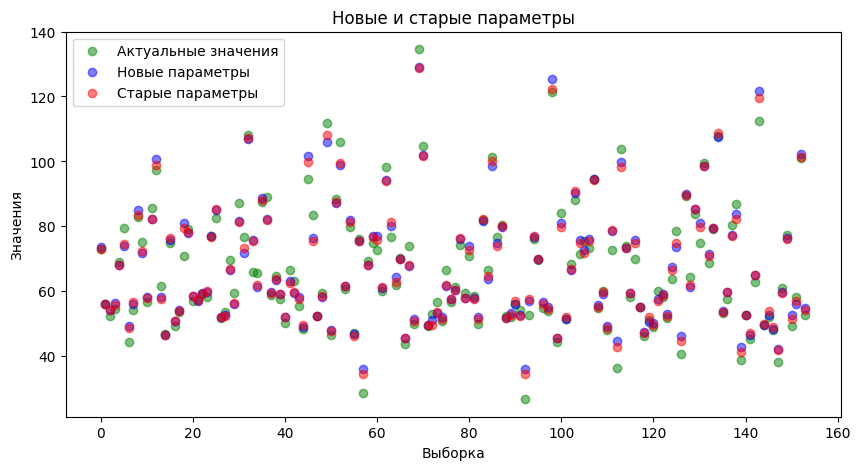

In [45]:
plt.figure(figsize=(10, 5))
plt.scatter(range(len(y_test)), y_test, label="Актуальные значения", color="green", alpha=0.5)
plt.scatter(range(len(y_test)), y_pred, label="Новые параметры", color="blue", alpha=0.5)
plt.scatter(range(len(y_test)), y_oldpred, label="Старые параметры", color="red", alpha=0.5)
plt.xlabel("Выборка")
plt.ylabel("Значения")
plt.legend()
plt.title("Новые и старые параметры")
plt.show()